In [21]:
from MSSD import MSSD
import math
import numpy as np
from alive_progress import alive_bar
import matplotlib.pyplot as plt
%matplotlib inline


In [24]:
def sphere_point(theta, phi):
    return [math.sin(phi)*math.cos(theta), math.sin(phi)*math.sin(theta), -math.cos(phi)]

def great_circle_with_time(theta, length=10, noise=False, sigma=0.05, time_i=0, time_f=10):
    traj = np.zeros((time_f-time_i,4))
    for i in range(0, time_f-time_i):
        traj[i][1:] = sphere_point(theta, (time_i+i)*math.pi/length)
        traj[i][0] = sphere_point(theta, (time_i+i)*math.pi/length)[2]
        if noise == True:
            traj[i][1:] = np.add(traj[i],sigma*np.random.randn(1,3))
    return traj

l = 2000
traj1 = great_circle_with_time(2*math.pi*0.1, length=l, time_i=0, time_f=l)
traj2 = great_circle_with_time(2*math.pi*0.6, length=l, time_i=0, time_f=l)

In [25]:
dist_mat = np.zeros((len(traj1), len(traj2)))
eps = 1.976

with alive_bar(len(traj1)*len(traj2), force_tty=True) as bar:
    for i in range(len(traj1)):
        for j in range(len(traj2)):
            dist_mat[i,j] = round(np.linalg.norm(traj1[i][1:]-traj2[j][1:]), 3)
            bar()

print(dist_mat)
print((dist_mat < eps)*np.ones((len(traj1), len(traj2))))
#plt.matshow((dist_mat < eps))

|████████████████████████████████████████| 4000000/4000000 [100%] in 4:19.9 (15390.00/s)   101608/4000000 [3%] in 7s (15389.8/s, eta: 4▂▄▆ 200872/4000000 [5%] in 13s (15579.4/s, eta: (15327.5/s, eta: 526527/4000000 [13%] in 35s (14977.1/s, eta:(14953.2/s, eta: ▆█▆ 608688/4000000 [15%] in 41s (14973.1/s, eta:▇▇▅ 615066/4000000 [15%] in 41s (14973.0/s, eta:▆▄▂ 648205/4000000 [16%] in 43s (15002.5/s, eta: 680690/4000000 [17%] in 45s (15060.1/s, eta: (15129.1/s, eta: ▃▁▃ 940660/4000000 [24%] in 1:02 (15194.1/s, eta (15223.2/s, eta (15250.4/s, et▅▇▇ 1057216/4000000 [26%] in 1:09 (15253.1/s, et▂▂▄ 1109111/4000000 [28%] in 1:13 (15268.5/s, et1134229/4000000 [28%] in 1:14 (15249.4/s, et▆█▆ 1257566/4000000 [31%] in 1:22 (15279.3/s, et in 1:28 (15300.1/s, et 1402526/4000000 [35%] in 1:32 (15304.4/s, et1460257/4000000 [37%] in 1:35 (15309.4/s, etin 1:40 (15311.6/s, et1542541/4000000 [39%] in 1:41 (15287.0/s, et ▇▅▃ 1577619/4000000 [39%] in 1:43 (15288.6/s, et1630523/4000000 [41%] in 1:46 (15313.3

In [26]:
mssd = MSSD()
mssd.set_trajectories(traj1, traj2)

mssd.compute_filt()
mssd.t_thresh_metric(7)

Sorting time:
0.6134717630000068
Iteration time:
43.39120534799997
Post processing time:
2.9563950919999797


0.019

[0.765 1.045 1.299 1.521 1.705 1.848 1.945 1.994]


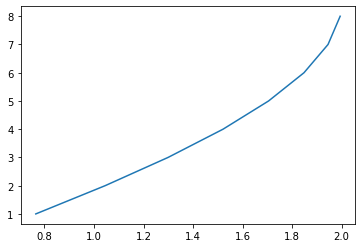

In [5]:
print(mssd.filt)

x = [i+1 for i in range(mssd.filt.shape[0])]
y = [mssd.filt[i] for i in range(mssd.filt.shape[0])]

plt.plot(y,x)
plt.show()